In [19]:
from IPython.display import display, Math, Latex

## Why SVD (factorization) 
- extract dominant patterns of high dimensional data from low rank / dimensions
- Guaranteed to exist for any matrix, unlike eigendecomposition
- each SVD is unique 
- used to derive PCA
- Generalizes FFT (fast Fourier transform)


## Intuition

https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

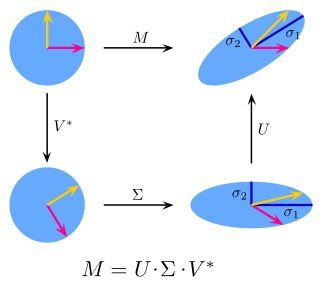

In [18]:
from IPython import display
display.Image("./Assets/svd_wiki.png")

- $V^T$ rotation
- $ \Sigma $ scaling
    - (diagonal matrices only transform by rescaling, not rotation)
- $U$ rotation again

In [25]:
import graph_func as gf

<AxesSubplot:>

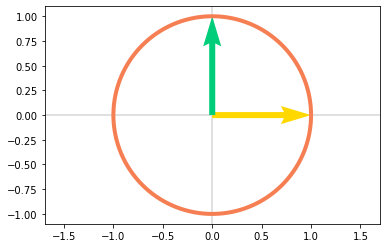

In [31]:
# we start with identity matrix 

I = np.array([
    [1, 0],
    [0, 1]
])

gf.matrix_2d_effect(I)

<AxesSubplot:>

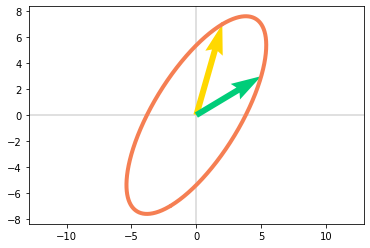

In [30]:
# effect of matrix A on identity matrix
A = np.array([
    [2, 5],
    [7, 3]
])

gf.matrix_2d_effect(A)

### 1. Steps of SVD

In [53]:
# we find SVD of matrix A 
U, Sigma, V_transpose = np.linalg.svd(A)

$V^T$ 
- $U$ and $V^T$ are orthogonal, thus the transformations will be simple rotations, which can be thought of as change of basis

<AxesSubplot:>

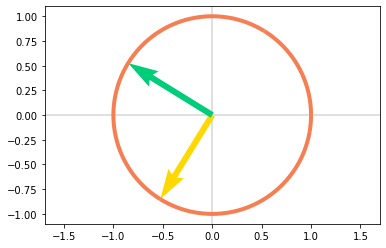

In [41]:
gf.matrix_2d_effect(V_transpose)

$\Sigma V^T $ 
- simple scaling since $\Sigma$ is diagonal

<AxesSubplot:>

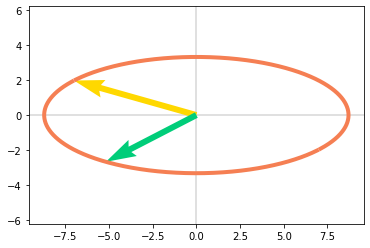

In [49]:
gf.matrix_2d_effect(np.diag(Sigma) @ V_transpose)

$U \Sigma V^T $ 

<AxesSubplot:>

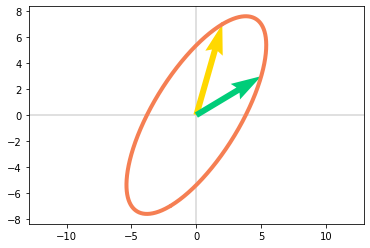

In [52]:
# finally
gf.matrix_2d_effect(U @ np.diag(Sigma) @ V_transpose)

### 2. See difference from steps of eigendecomposition


$$A = Q \Lambda Q^{-1}$$

In [54]:
lambd, Q = np.linalg.eig(A)

$ Q^{-1} $
- rotates and scales the unit circle and the basis vectors. The transformation of a non-orthogonal matrix is not a simple rotation.

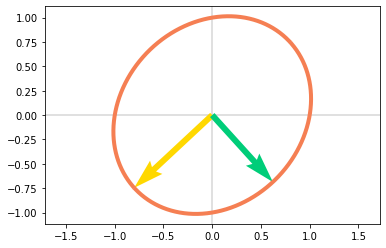

In [56]:
ax = gf.matrix_2d_effect(np.linalg.inv(Q))

$  \Lambda  Q^{-1} $
-  stretching and a reflection through the y-axis (the yellow vector is now on the right of the green vector).

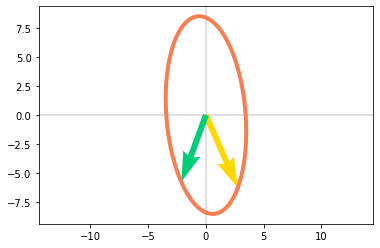

In [59]:
ax = gf.matrix_2d_effect(np.diag(lambd) @ np.linalg.inv(Q))

$ Q \Lambda Q^{-1}$

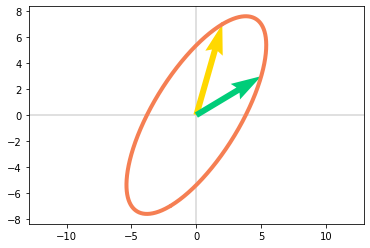

In [62]:
ax = gf.matrix_2d_effect(Q @ np.diag(lambd) @ np.linalg.inv(Q))

 With SVD, you have three different transformations, but two of them are only rotation. With eigendecomposition, there are only two different matrices, but the transformation associated with $Q$ is not necessarily a simple rotation (it is only the case when $\Lambda$ is symmetric).

## Relationship of SVD and eigendecomposition (most intuitive way to understand SVD)

Now that we understand the kind of decomposition done with the SVD, we want to know how the sub-transformations are found.

The matrices $U$, $\Sigma$ and $V$ can be found by transforming $A$ in a square matrix and by computing the eigenvectors of this square matrix. The square matrix can be obtained by multiplying the matrix $A$ by $A^T$ in one way or the other. Note these multiplications of $A^TA$ are correlation matrices of A.

- $U$ corresponds to the <b> eigenvectors </b> of $AA^T$ 
- $V$ corresponds to the <b> eigenvectors </b>  of $A^TA$
- $\Sigma $ corresponds to the <b> eigenvalues </b>  $AA^T$ or $A^TA$ which are the same.

https://www.youtube.com/watch?v=WmDnaoY2Ivs&list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv&index=4

### Derivation

Given that the economy SVD = $ \hat U \hat \Sigma V^T  $


Note: Tranpose product of matrix by flipping order of products, then tranpose each of them. 

Thus  $ A= \hat U \hat \Sigma V^T  $ tranpose will give $A^T = V \hat{\Sigma} \hat{U}^T $       

Sub into: 

$$ A^TA = V \hat{\Sigma} \hat{U}^T \hat{U} \hat{\Sigma} V^T = V \hat{\Sigma}^2 V^T  $$

Multiply by V on both sides
$$ A^TAV = V \hat{\Sigma}^2   $$

we can see this form as the eignedecomposition form $ Av = \lambda v  $  where $A$ is  $A^TA$
 
Thus $ V $ is <b> eigenvector </b> and $ \hat{\Sigma}^2 $ is the <b> eigenvalue </b> of the correlation matrix $ A^TA $

we can repeat this on $AA^T$ to derive that $ \hat{U}$ is eigenvector of  $AA^T$

Given that

$
A=
\begin{bmatrix}
7 & 2\\
3 & 4 \\
5 & 3
\end{bmatrix}
$

In [72]:
A = np.array([[7, 2], [3, 4], [5, 3]])
U, D, V = np.linalg.svd(A)
U

array([[-0.69366543,  0.59343205, -0.40824829],
       [-0.4427092 , -0.79833696, -0.40824829],
       [-0.56818732, -0.10245245,  0.81649658]])

see that $U = AA^T $ ... and so on...

In [74]:
U

array([[-0.69366543,  0.59343205, -0.40824829],
       [-0.4427092 , -0.79833696, -0.40824829],
       [-0.56818732, -0.10245245,  0.81649658]])

In [73]:
np.linalg.eig(A.dot(A.T))[1]

array([[-0.69366543, -0.59343205, -0.40824829],
       [-0.4427092 ,  0.79833696, -0.40824829],
       [-0.56818732,  0.10245245,  0.81649658]])

## Overview

Start with dataset with $ X \in  \mathbb{C}^{n x m}  $ 

For example, columns may represent images that have been reshaped into column vectors with as many elements as pixels in the image.

For many systems $ n \geq m $ (row > col), resulting in a tall-skinny matrix

$$ X = U \Sigma V^T $$

where 
- $ U \in \mathbb{C}^{nxm} $  and $ V \in \mathbb{C}^{mxm} $ are 
    - unitary matrices ( square matrix is unitary if $U x U = I$ ) 
    - with orthonormal columns (orthog + unit length =1 )
- $ \Sigma \in \mathbb{R} $ is a matrix with real, non-negative entries on the diagonal and zeros off the diagonal.
- The columns of $ U $ are called left singular vectors of $ X $ and the columns of $V $ are right singular vectors ( and thus the rows of $V^T or V^* $).
- The diagonal elements of $  \overset{\wedge} \Sigma \in \mathbb{C}^{m×m} $ are called singular values and they are ordered from largest to smallest. The rank of $ X$ is equal to the number of non-zero singular values.
- The columns of $ \overset{\wedge}U⊥ $ span a vector space that is complementary and orthogonal to that spanned by $\overset{\wedge} U $.

<b> Note: Singular matrix </b>
- means det =0 , and we know from bluebrown vids that determinant is area of matrix
- i.e. it is singular if it misses some point in n-dimensional space and non-singular if it doesn't, or If this matrix is singular i.e. has determinant zero, then this corresponds to the parallelepiped being completely squashed, a line or just a point.
- https://math.stackexchange.com/questions/166021/what-is-the-geometric-meaning-of-singular-matrix 
- The singular values are always $ \geq $ 0

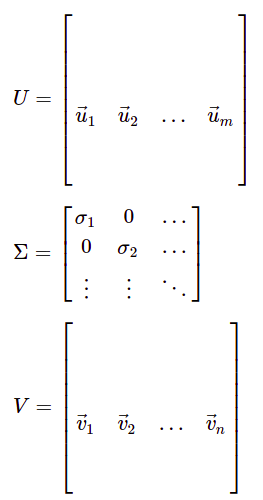

In [2]:
from IPython import display
display.Image("./Assets/svd_expand.png")

- since $\Sigma $ is diagonal matrix (only 1 value per col) , EACH column of A can be expressed as:

$ \overrightarrow{a_i} = \overrightarrow{u_1} * \sigma_1 * V_{1,i} +  \overrightarrow{u_2} * \sigma_2 * V_{2,i} + ... = U * \Sigma * \overrightarrow{vi} $

- since $\sigma_1$ and $\sigma_2$ more important than the other $\sigma$s, the first few <b> rows </b> of $V^T$ are also more important than the rest 

### Economy SVD   ($\hat U \hat \Sigma V^T $)

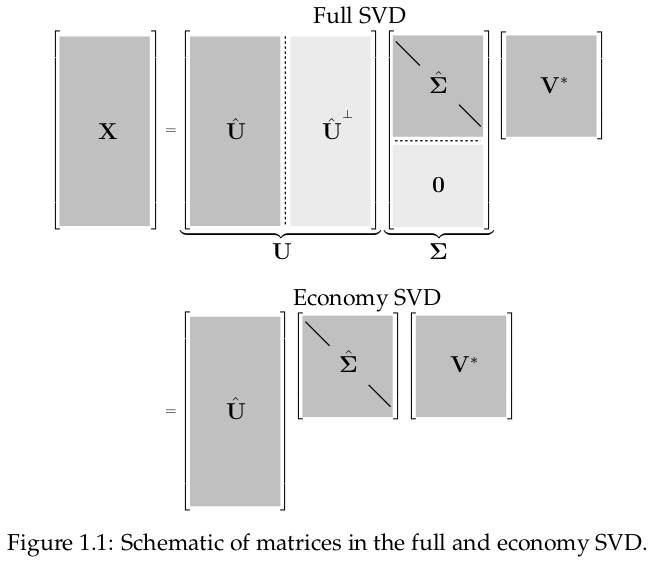

In [21]:
from IPython import display
display.Image("./Assets/svd1_1.png")

In [4]:
import numpy as np

In [5]:
X = np.random.rand(5,3 )
X

array([[0.33488063, 0.28302716, 0.79650049],
       [0.02609306, 0.2264553 , 0.0179688 ],
       [0.27265182, 0.07477212, 0.39242771],
       [0.19306191, 0.32351726, 0.83874688],
       [0.73391027, 0.21395777, 0.35070014]])

In [9]:
# full svd
U, S, V = np.linalg.svd(X, full_matrices = True )
U

array([[-0.59099324,  0.21909194, -0.07378895, -0.38550937, -0.66982343],
       [-0.06572053,  0.00275609,  0.92128399, -0.34907011,  0.1583006 ],
       [-0.31162896, -0.07409998, -0.35956868, -0.60209625,  0.63685716],
       [-0.57714738,  0.49167501,  0.10348114,  0.54270082,  0.34630054],
       [-0.46496892, -0.83949747,  0.07611184,  0.26923689, -0.02768371]])

In [10]:
# economy svd - more efficient for non-square matrices
Uhat, Shat, Vhat = np.linalg.svd(X, full_matrices=False)
Shat

array([1.52519361, 0.53826157, 0.22307387])

see that s == shat, but u != uhat since u* shat (has 0 values)--> uhat

## Truncating SVD
matrix approximation 
- https://www.youtube.com/watch?v=xy3QyyhiuY4&list=PLMrJAkhIeNNSVjnsviglFoY2nXildDCcv&index=5

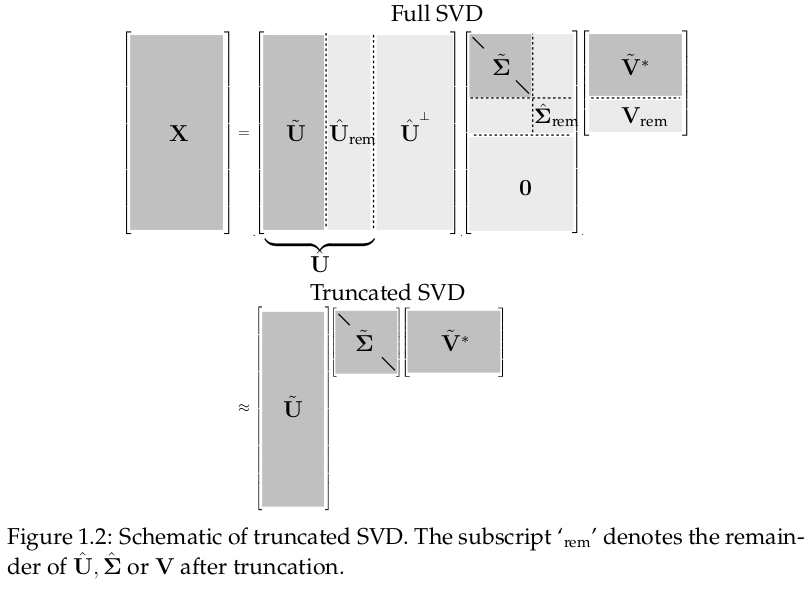

In [73]:
display.Image("./Assets/svd1_2.png")

- remember that since # rows >> # cols, truncating the columns reduces data alot
- after 

## SVD on black & white image

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

from PIL import Image

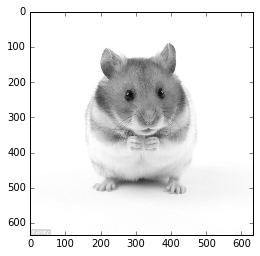

In [125]:
img = Image.open('Assets/bear_ham.jpg')
imggray = img.convert('LA')  # convert to greyscale
plt.figure(figsize=(4, 5))
plt.imshow(imggray)

- Why greyscale? A black and white image is just a matrix where the numbers represent the intensity of a given pixel, which can be decomposed just like any other.
- Converting image into numpy matrix 
- <b> PIL .getdata() </b> 
    - Returns the contents of this image as a sequence object containing pixel values. The <b> sequence object </b> is flattened, so that values for line one follow directly after the values of line zero, and so on.
    - band --> returns 1st index of band tuple ("LA")

In [121]:
imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat

array([255., 255., 255., ..., 254., 253., 253.])

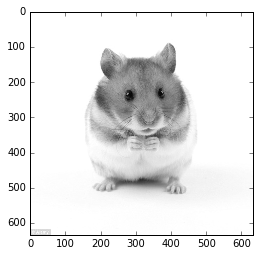

In [131]:
imgmat.shape = (imggray.size[0], imggray.size[1]) # np.reshape aray to original shape of image
imgmat = np.matrix(imgmat)
plt.figure(figsize=(4,5))
plt.imshow(imgmat, cmap='gray')

In [86]:
imgmat[:6]

matrix([[255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.]])

In [144]:
U, sigma, V = np.linalg.svd(imgmat)
# sigma output is 1D array. to diagonalize np.diag

Computing an approximation of the image using the first column of  $U$  and first row of  $V$  ($ u_1\sigma_1 $) reproduces the most prominent feature of the image, the light area on top and the dark area on the bottom. The darkness of the arch causes the extra darkness in the middle of the reconstruction. Each column of pixels in this image is a different weighting of the same values, $ u⃗_1 $ :

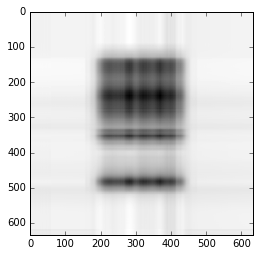

In [141]:
i = 2
reconstimg = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
plt.imshow(reconstimg, cmap='gray')

## SVD on words, similarity
https://www.frankcleary.com/svd/

In [3]:
import pandas as pd

c_names = ['post1', 'post2', 'post3', 'post4']
words = ['ice', 'snow', 'tahoe', 'goal', 'puck']
post_words = pd.DataFrame([[4, 4, 6, 2],
                           [6, 1, 0, 5],
                           [3, 0, 0, 5],
                           [0, 6, 5, 1],
                           [0, 4, 5, 0]],
                          index = words,
                          columns = c_names)
post_words.index.names = ['word:']
post_words

post1  post2  post3  post4
word:                            
ice        4      4      6      2
snow       6      1      0      5
tahoe      3      0      0      5
goal       0      6      5      1
puck       0      4      5      0

In [7]:
import numpy as np

U, sigma, V_T = np.linalg.svd(post_words)
V_T

array([[-0.39563365, -0.57086917, -0.6301003 , -0.34721178],
       [-0.59983555,  0.33174302,  0.4082791 , -0.60286986],
       [ 0.60400142, -0.40535325,  0.32193174, -0.60599586],
       [-0.34475152, -0.63225288,  0.57675103,  0.38569539]])

In [13]:
VT_df = pd.DataFrame(V_T, columns=c_names)
VT_df

post1     post2     post3     post4
0 -0.395634 -0.570869 -0.630100 -0.347212
1 -0.599836  0.331743  0.408279 -0.602870
2  0.604001 -0.405353  0.321932 -0.605996
3 -0.344752 -0.632253  0.576751  0.385695


To help visualize the similarity between posts,  $V_T$  can be displayed as an image. Notice how the similar posts (1 and 4, 2 and 3) have similar color values in the first two rows:

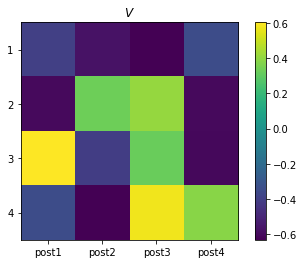

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(V_T, interpolation='none')
plt.xticks(range(len(c_names)))
plt.yticks(range(len(words)))
plt.ylim([len(words) - 1.5, -.5])
ax = plt.gca()
ax.set_xticklabels(c_names)
ax.set_yticklabels(range(1, len(words) + 1))
plt.title("$V$")
plt.colorbar();


Another thing the singular value decomposition tells us is what most defines the different categories of posts. The skiing posts have very different values from the hockey posts in the second row of  $V^T$ , i.e.                 $V_{2,1} \approx V_{2,4}$ and  $V_{2,2} \approx V_{2,3}$  but  $V_{2,1} \ne V_{2,2}$ .

Recall from above that:

$ \overrightarrow{a_i} = \overrightarrow{u_1} * \sigma_1 * V_{1,i} + ... = U * \Sigma * \overrightarrow{vi} $


Thus the posts differ very much in how much the values in  $ \overrightarrow{u_2}$ contribute to their final word count. Here is $ \overrightarrow{u_2}$ :

In [23]:
pd.DataFrame(U[:,1], index=words)

0
ice    0.018526
snow  -0.678291
tahoe -0.519801
goal   0.370263
puck   0.363717


Now we'll look in more detail at how similar each post is to the others. I've defined a function to calculate the distance between two column vectors of  $V $, weighted by the weights in  $\Sigma$ . For   $\overrightarrow v_i$  and   $\overrightarrow v_j$   the function calculates  $∥\Sigma ∗( \overrightarrow v_i - \overrightarrow v_j )∥ $. This function is applied to every pairwise combination of  $\overrightarrow v_i$  and   $\overrightarrow v_j$  , giving a metric of how similar two papers are (smaller values are more similar).

In [42]:
def dist(col1, col2, sigma=sigma):
    """Return the norm of (col1 - col2), where the differences in 
    each dimension are wighted by the values in sigma."""
    return np.linalg.norm(np.array(col1 - col2) * sigma)

# make empty dataframe
dist_df = pd.DataFrame(index=VT_df.columns, columns=VT_df.columns)
dist_df

post1 post2 post3 post4
post1   NaN   NaN   NaN   NaN
post2   NaN   NaN   NaN   NaN
post3   NaN   NaN   NaN   NaN
post4   NaN   NaN   NaN   NaN

In [39]:
for cname in VT_df.columns:
    dist_df[cname] = VT_df.apply(lambda x: dist(VT_df[cname].values, x.values))
dist_df

post1     post2      post3      post4
post1  0.000000  9.273618   9.949874   3.162278
post2  9.273618  0.000000   2.645751   9.273618
post3  9.949874  2.645751   0.000000  10.344080
post4  3.162278  9.273618  10.344080   0.000000

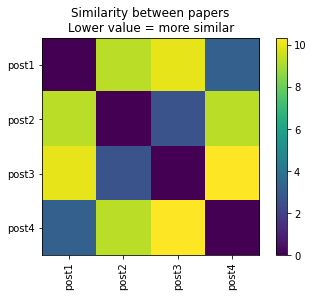

In [40]:
plt.imshow(dist_df.values, interpolation='none')
ax = plt.gca()
plt.xticks(range(len(dist_df.columns.values)))
plt.yticks(range(len(dist_df.index.values)))
ax.set_xticklabels(dist_df.columns.values, rotation=90)
ax.set_yticklabels(dist_df.index.values)
plt.title("Similarity between papers\nLower value = more similar")
plt.colorbar()

In [49]:
for paper in dist_df.columns:
    sim_papers_df = dist_df.sort_values(by=paper, axis= 0)[paper]
    sim_papers = sim_papers_df.drop([paper]).index
    print('Papers most similar to ' + paper + ':')
    print(', '.join(sim_papers))
    print('\n')

Papers most similar to post1:
post2, post3, post4


Papers most similar to post2:
post1, post3, post4


Papers most similar to post3:
post1, post2, post4


Papers most similar to post4:
post1, post2, post3


